# Memory Networks

## Overview

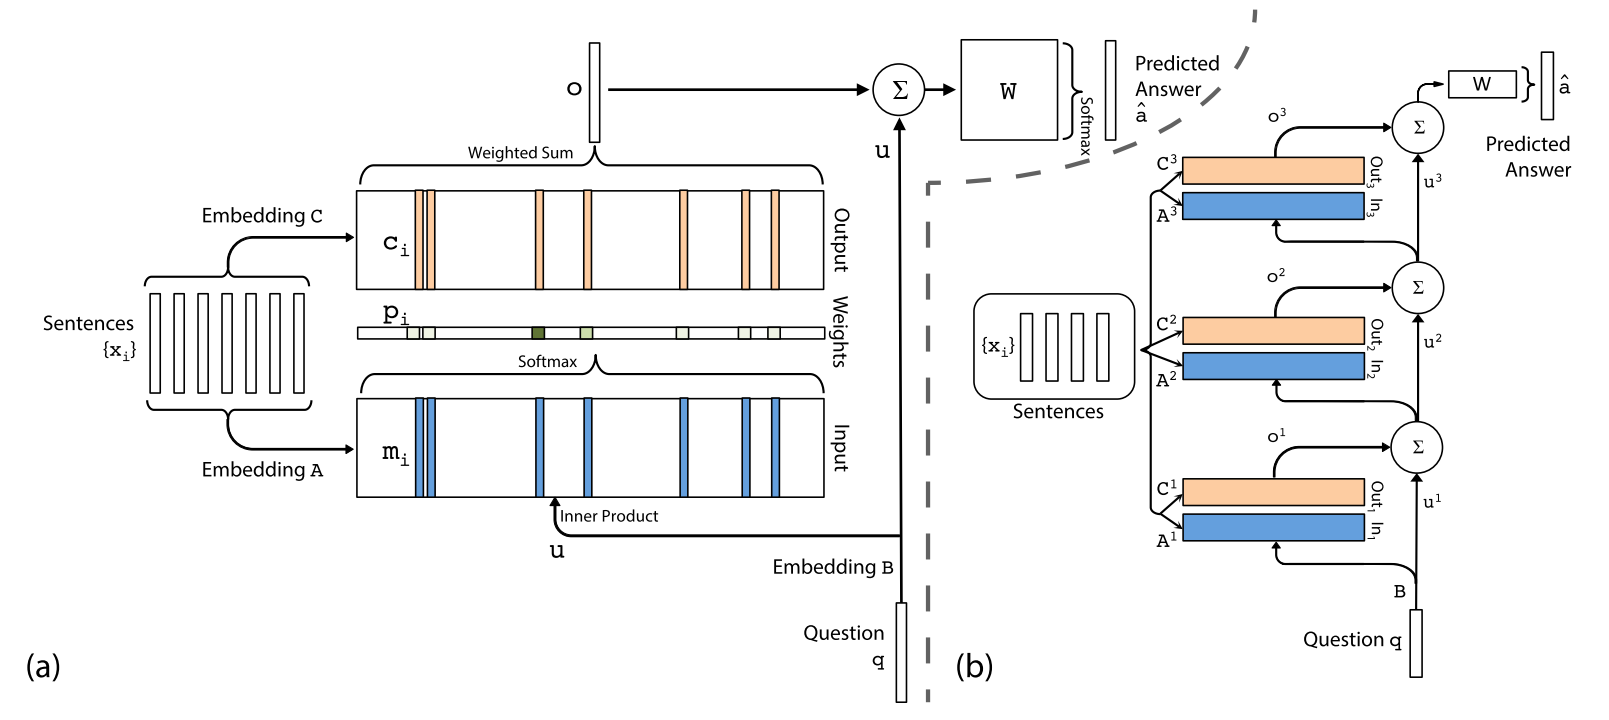

## Data

In [1]:
from keras.utils.data_utils import get_file
import tarfile
import re

Using TensorFlow backend.


### babi tasks

We'll use data and tasks from the bAbI tasks as descriped in the [paper](http://arxiv.org/abs/1502.05698). 

* [github](https://github.com/facebook/bAbI-tasks)

bAbI tasks dataset and challenges

In [2]:
path = get_file('babi-tasks-v1-2.tar.gz', 
                origin='https://s3.amazonaws.com/text-datasets/babi_tasks_1-20_v1-2.tar.gz')
tar = tarfile.open(path)

In [3]:
challenges = {
    # QA1 with 10,000 samples
    'single_supporting_fact_10k': 'tasks_1-20_v1-2/en-10k/qa1_single-supporting-fact_{}.txt',
    # QA2 with 10,000 samples
    'two_supporting_facts_10k': 'tasks_1-20_v1-2/en-10k/qa2_two-supporting-facts_{}.txt',
    'two_supporting_facts_1k': 'tasks_1-20_v1-2/en/qa2_two-supporting-facts_{}.txt',
}
challenge_type = 'single_supporting_fact_10k'
# challenge_type = 'two_supporting_facts_10k'
challenge = challenges[challenge_type]

In [22]:
def tokenize(sentence):
    # tokenize words
    return [x.strip() for x in re.split('(\W+)', sentence) if x.strip()]

In [23]:
def parse_stories(lines):
    data = []
    story = []
    for line in lines:
        line = line.decode('utf-8').strip()
        nid, line = line.split(' ', 1)
        # new story starts at nid = 1
        if int(nid) == 1: story = []
        # lines with query, answer and supporting sentence contains Tab '\t'
        if '\t' in line:
            q, a, supporting = line.split('\t')
            q = tokenize(q)
            substory = None
            # add nid to each sentece in story
            substory = [[str(i)+':']+x for i,x in enumerate(story) if x]
            data.append((substory, q, a))
            story.append('')
        # 'normal' sentence in story
        else: 
            story.append(tokenize(line))
    return data

In [26]:
def get_stories(f):
    data = parse_stories(f.readlines())
    return [(story, question, answer) for story, question, answer in data]

In [30]:
train_stories = get_stories(tar.extractfile(challenge.format('train')))
test_stories = get_stories(tar.extractfile(challenge.format('test')))

[([['0:', 'Mary', 'moved', 'to', 'the', 'bathroom', '.'],
   ['1:', 'John', 'went', 'to', 'the', 'hallway', '.']],
  ['Where', 'is', 'Mary', '?'],
  'bathroom'),
 ([['0:', 'Mary', 'moved', 'to', 'the', 'bathroom', '.'],
   ['1:', 'John', 'went', 'to', 'the', 'hallway', '.'],
   ['3:', 'Daniel', 'went', 'back', 'to', 'the', 'hallway', '.'],
   ['4:', 'Sandra', 'moved', 'to', 'the', 'garden', '.']],
  ['Where', 'is', 'Daniel', '?'],
  'hallway'),
 ([['0:', 'Mary', 'moved', 'to', 'the', 'bathroom', '.'],
   ['1:', 'John', 'went', 'to', 'the', 'hallway', '.'],
   ['3:', 'Daniel', 'went', 'back', 'to', 'the', 'hallway', '.'],
   ['4:', 'Sandra', 'moved', 'to', 'the', 'garden', '.'],
   ['6:', 'John', 'moved', 'to', 'the', 'office', '.'],
   ['7:', 'Sandra', 'journeyed', 'to', 'the', 'bathroom', '.']],
  ['Where', 'is', 'Daniel', '?'],
  'hallway'),
 ([['0:', 'Mary', 'moved', 'to', 'the', 'bathroom', '.'],
   ['1:', 'John', 'went', 'to', 'the', 'hallway', '.'],
   ['3:', 'Daniel', 'went', 'b